In [1]:
import numpy as np
import pandas as p

df = p.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [2]:
title = df['headline'].values
label = df['is_sarcastic'].values

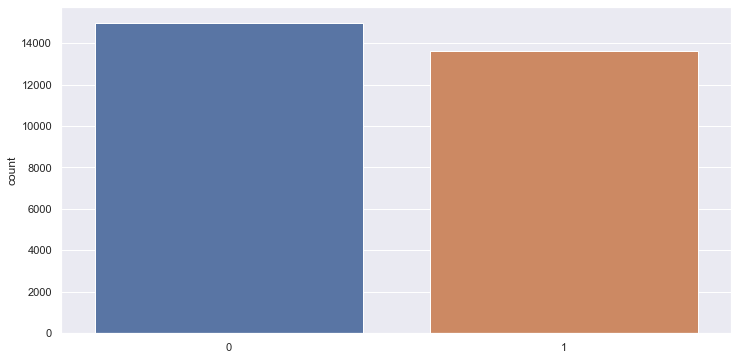

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.countplot(label)

In [4]:
#Split train/test data
from sklearn.model_selection import train_test_split
title_train, title_test, label_train, label_test = train_test_split(title, label, test_size=0.3, random_state=0)

print(title_train.shape, label_train.shape, title_test.shape, label_test.shape)


(20033,) (20033,) (8586,) (8586,)


In [5]:
#Data Checking
training_labels = set(label_train)
print(training_labels)
from scipy.stats import itemfreq
training_category_dist = itemfreq(label_train)
print(training_category_dist)

{0, 1}
[[    0 10425]
 [    1  9608]]


C:\Users\xiwsh\anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """


In [6]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, ngram_range=(1,3), token_pattern='[a-z]+', min_df=1)

# MNB
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, ngram_range=(1,2), token_pattern='[a-z]+', min_df=1)

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=(1,2), token_pattern='[a-z]+', min_df=1)
#unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=(1,2), token_pattern='[a-z]+', min_df=1)

In [9]:
title_train_vec = unigram_tfidf_vectorizer.fit_transform(title_train)
title_test_vec = unigram_tfidf_vectorizer.transform(title_test)

In [10]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=2)

# use the training data to train the model
svm_clf.fit(title_train_vec,label_train)

LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [11]:
#Test the LinearSVC classifier
svm_clf.score(title_test_vec,label_test)

0.8640810621942697

In [ ]:
#0.8576752853482413 count
#0.860587002096436 bool C=0.3
#0.8640810621942697 tfidf C=2

In [12]:
# SVM cross validation

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
svm_pipe = Pipeline([('vect', TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=(1,2), token_pattern='[a-z]+', min_df=1)),('svm',LinearSVC())])
scores = cross_val_score(svm_pipe,title,label,cv=5)
print(sum(scores)/len(scores))
#0.8672557970687992

0.8672557970687992


In [13]:
from sklearn.metrics import confusion_matrix
label_pred = svm_clf.predict(title_test_vec)
svm_cm=confusion_matrix(label_test, label_pred, labels=[0,1])
print(svm_cm)
print()

[[3972  588]
 [ 579 3447]]



In [14]:
from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(label_test, label_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4560
           1       0.85      0.86      0.86      4026

    accuracy                           0.86      8586
   macro avg       0.86      0.86      0.86      8586
weighted avg       0.86      0.86      0.86      8586



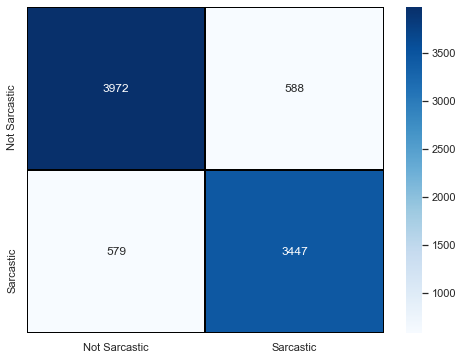

In [43]:
svm_cm = p.DataFrame(svm_cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (8,6))
sns.heatmap(svm_cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [15]:
err_cnt2 = 0
for i in range(0, len(label_test)):
    if(label_test[i]==1 and label_pred[i]==0):
        print(title_test[i])
        err_cnt2 = err_cnt2+1
print("errors:", err_cnt2)

nation's voyeurs watch women's march on washington from bushes
special pull-out section: rural illinois' sexist moms
pork chop trapped in airtight container
microsoft signs justice dept. attorney to $350 million endorsement deal
trump: 'america hasn't been stronger or more united since i first opened my eyes and created the universe'
revolutionary new alarm clock for the deaf uses no hammers
eric trump aims laser pointer at don jr. while flicking lights on and off to erase memory of russia meeting
u.s. intensifies empty-threat campaign against north korea
report: a lot of people's dream is to have sex with a ghost
frozen tundra of emptiness stretching out forever and ever weighed against date with mike4763
new jersey supreme court rules the bastard had it coming
'please hold while i send you through to mr. gilmore,' says jim gilmore inside empty campaign office
guy in suit handling newspaper like a pro
300 naked women feared lost in computer crash
james fenimore cooper, famed american 

In [132]:
svm_feature_ranks = sorted(zip(svm_clf.coef_[0], unigram_tfidf_vectorizer.get_feature_names()))
svm_highest_features = svm_feature_ranks[-30:]
print(svm_highest_features)

[(2.100771067583977, 'god'), (2.118012988496885, 'study'), (2.1196926670680916, 'desperate'), (2.129008779016082, 'repeatedly'), (2.1600234667062415, 'trump as'), (2.173199863018536, 'home for'), (2.227054932229945, 'gop leaders'), (2.244756192924852, 'audience'), (2.269834670675926, 'romney'), (2.2746339241756206, 'it is'), (2.331456582718351, 'recommends'), (2.3387015730670098, 'the onion'), (2.3415379327798367, 'allows'), (2.403640596428503, 'clearly'), (2.4381938946439705, 'only'), (2.4515281925385564, 'fuck'), (2.452006024592684, 'bar'), (2.5086096236513216, 'man'), (2.548807674316001, 'shit'), (2.6177538846659156, 'report'), (2.670639459655253, 'announces'), (2.690807684563306, 'local'), (2.6951775206434383, 'wondering'), (2.860386545461083, 'assures'), (2.908536421755268, 'fucking'), (2.9470208726965197, 'kavanaugh'), (2.9835465857157635, 'onion'), (2.9889337294466025, 'after learning'), (3.716823667622289, 'area'), (4.880991885003928, 'nation')]


In [133]:
svm_most_sarcastic_30 = svm_feature_ranks[-30:]
print("SVM Most Sarcastic words")
for i in range(0, len(svm_most_sarcastic_30)):
    print(svm_most_sarcastic_30[i])
print()

SVM Most Sarcastic words
(2.100771067583977, 'god')
(2.118012988496885, 'study')
(2.1196926670680916, 'desperate')
(2.129008779016082, 'repeatedly')
(2.1600234667062415, 'trump as')
(2.173199863018536, 'home for')
(2.227054932229945, 'gop leaders')
(2.244756192924852, 'audience')
(2.269834670675926, 'romney')
(2.2746339241756206, 'it is')
(2.331456582718351, 'recommends')
(2.3387015730670098, 'the onion')
(2.3415379327798367, 'allows')
(2.403640596428503, 'clearly')
(2.4381938946439705, 'only')
(2.4515281925385564, 'fuck')
(2.452006024592684, 'bar')
(2.5086096236513216, 'man')
(2.548807674316001, 'shit')
(2.6177538846659156, 'report')
(2.670639459655253, 'announces')
(2.690807684563306, 'local')
(2.6951775206434383, 'wondering')
(2.860386545461083, 'assures')
(2.908536421755268, 'fucking')
(2.9470208726965197, 'kavanaugh')
(2.9835465857157635, 'onion')
(2.9889337294466025, 'after learning')
(3.716823667622289, 'area')
(4.880991885003928, 'nation')



In [ ]:
#NBC

In [16]:
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

# MNB
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, ngram_range=(1,3), token_pattern='[a-z]+', min_df=1)
#CountVectorizer(encoding='latin-1', binary=False, ngram_range=(1,3), token_pattern='[a-z]+', min_df=1)
#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=(1,3), token_pattern='[a-z]+', min_df=2)

In [17]:
title_train_vec = unigram_count_vectorizer.fit_transform(title_train)
title_test_vec = unigram_count_vectorizer.transform(title_test)

In [18]:
#Train a MNB classifier
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(title_train_vec,label_train)
print(nb_clf.classes_)
print(nb_clf.feature_log_prob_.shape)

[0 1]
(2, 302037)


In [19]:
nb_clf.score(title_test_vec,label_test)

0.8625669694852085

In [ ]:
#0.8625669694852085 count
#0.8556953179594688 tfidf

In [20]:
# MNB cross validation

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False, ngram_range=(1,3), token_pattern='[a-z]+', min_df=1)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, title, label, cv=5)
avg=sum(scores)/len(scores)
print(avg)
#acc: 0.8644954346438591

0.8644954346438591


In [21]:
# print confusion matrix (row: ground truth; col: prediction)

from sklearn.metrics import confusion_matrix
label_pred = nb_clf.fit(title_train_vec, label_train).predict(title_test_vec)
cm=confusion_matrix(label_test, label_pred, labels=[0,1])
print(cm)

[[4096  464]
 [ 716 3310]]


In [22]:
# print classification report
from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(label_test, label_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4560
           1       0.88      0.82      0.85      4026

    accuracy                           0.86      8586
   macro avg       0.86      0.86      0.86      8586
weighted avg       0.86      0.86      0.86      8586



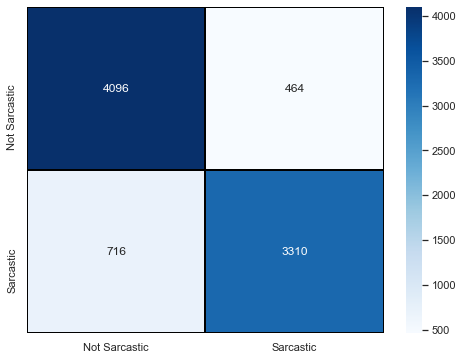

In [51]:
cm = p.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [23]:
err_cnt = 0
for i in range(0, len(label_test)):
    if(label_test[i]== 1 and label_pred[i]== 0):
        print(title_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

congress reassures nervous zuckerberg they won't actually do anything about this
nation's voyeurs watch women's march on washington from bushes
special pull-out section: rural illinois' sexist moms
nickname to forever prevent people from getting to know the real dumptruck
microsoft signs justice dept. attorney to $350 million endorsement deal
trump: 'america hasn't been stronger or more united since i first opened my eyes and created the universe'
revolutionary new alarm clock for the deaf uses no hammers
marauding gay hordes drag thousands of helpless citizens from marriages after obama drops defense of marriage act
eric trump aims laser pointer at don jr. while flicking lights on and off to erase memory of russia meeting
u.s. intensifies empty-threat campaign against north korea
banks introduce 75-cent surcharge for using word 'bank'
report: a lot of people's dream is to have sex with a ghost
biden investigated for questionable workers' comp claim
frozen tundra of emptiness stretchin

In [118]:
feature_ranks = sorted(zip(nb_clf.feature_log_prob_[1], unigram_count_vectorizer.get_feature_names()))
highest_features = feature_ranks[-30:]
print(highest_features)

[(-6.607987893821973, 'self'), (-6.5440391692216995, 'local'), (-6.535228539539545, 'way'), (-6.517836796827676, 'child'), (-6.4674059432007835, 'people'), (-6.435145080982562, 'world'), (-6.411614583572368, 'going'), (-6.403892537478458, 'white'), (-6.336953054803349, 'americans'), (-6.329784565324736, 'year old'), (-6.308582357674133, 'obama'), (-6.30161368835804, 'house'), (-6.260791693837785, 'life'), (-6.254147151119116, 'finds'), (-6.254147151119116, 'like'), (-6.2280018710147935, 'family'), (-6.16548151403346, 'study'), (-5.978122163209548, 'area man'), (-5.882355258117539, 'day'), (-5.882355258117539, 'time'), (-5.850891988661754, 'old'), (-5.770168777389313, 'year'), (-5.684178329533791, 'nation'), (-5.6619551927490805, 'woman'), (-5.615435177114188, 'trump'), (-5.5543992865278184, 'just'), (-5.3742731202973, 'area'), (-5.360630343893513, 'report'), (-4.694957418885816, 'new'), (-4.474603269659185, 'man')]


In [119]:
most_sarcastic_20 = feature_ranks[-20:]
print("Most Sarcastic words")
for i in range(0, len(most_sarcastic_20)):
    print(most_sarcastic_20[i])
print()

Most Sarcastic words
(-6.308582357674133, 'obama')
(-6.30161368835804, 'house')
(-6.260791693837785, 'life')
(-6.254147151119116, 'finds')
(-6.254147151119116, 'like')
(-6.2280018710147935, 'family')
(-6.16548151403346, 'study')
(-5.978122163209548, 'area man')
(-5.882355258117539, 'day')
(-5.882355258117539, 'time')
(-5.850891988661754, 'old')
(-5.770168777389313, 'year')
(-5.684178329533791, 'nation')
(-5.6619551927490805, 'woman')
(-5.615435177114188, 'trump')
(-5.5543992865278184, 'just')
(-5.3742731202973, 'area')
(-5.360630343893513, 'report')
(-4.694957418885816, 'new')
(-4.474603269659185, 'man')

